In [1]:
!pwd

/home/ajc/Documents/Repositories/raycasting-simulation


In [15]:
from fastai.vision.all import *

sys.path.append("./Utilities")
from UnrealUtils import UE4EnvWrapper

from time import sleep

In [3]:

model_path = Path("./Models/auto-gen-c.pkl")
model_inf = load_learner(model_path)

INFO:__init__:211:Got connection confirm: b'connected to Maze'
Is Listening
Client Connected
9000
Configuration
Config file: /home/ajc/Documents/Unreal Projects/Maze/LinuxNoEditor/Maze/Binaries/Linux/unrealcv.ini
Port: 9000
Width: 640
Height: 480
FOV: 90.000000
EnableInput: true
EnableRightEye: false



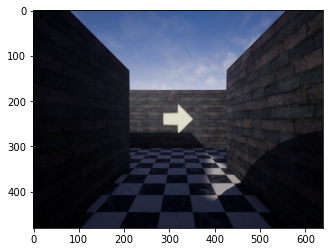

In [4]:
env = UE4EnvWrapper()

if env.isconnected():
    fig, ax = plt.subplots()
    ax.imshow(env.request_image())


In [17]:
env.reset()

for _ in range(10):
    img = env.request_image()
    # Remove alpha channel
    img = img[:,:,:3]
    action = model_inf.predict(img)
    print(action)

    if action[0] == 'straight':
        env.forward()
    elif action[0] == 'left':
        env.left()
    elif action[0] == 'right':
        env.right()
    else:
        print("ERROR:", action)
    
    sleep(5)

('straight', tensor(2), tensor([0.0017, 0.0068, 0.9914]))


('straight', tensor(2), tensor([6.8706e-04, 1.7226e-03, 9.9759e-01]))


('straight', tensor(2), tensor([0.0040, 0.0071, 0.9889]))


('straight', tensor(2), tensor([0.0017, 0.1237, 0.8746]))


('straight', tensor(2), tensor([0.0049, 0.3921, 0.6030]))


('straight', tensor(2), tensor([2.4321e-05, 3.1191e-02, 9.6878e-01]))


('straight', tensor(2), tensor([0.0313, 0.0476, 0.9210]))


('straight', tensor(2), tensor([0.0454, 0.0371, 0.9175]))


('straight', tensor(2), tensor([0.0265, 0.0607, 0.9128]))


('straight', tensor(2), tensor([0.0403, 0.0230, 0.9367]))


In [8]:
img.shape

(480, 640, 4)

In [9]:
type(img)

numpy.ndarray

In [10]:
img = img[:,:,:3]

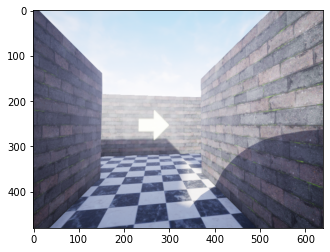

In [11]:
plt.imshow(img)